In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("headbrain.csv")
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [4]:
data.shape

(237, 4)

In [5]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

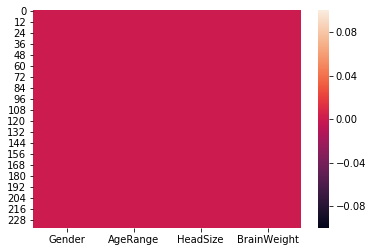

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [9]:
from sklearn.preprocessing import normalize
data=normalize(data)
data=pd.DataFrame(data)
data.head()

,0,1,2,3
0,0.000210,0.000210,0.947033,0.321135
1,0.000253,0.000253,0.944745,0.327805
2,0.000224,0.000224,0.954261,0.298976
3,0.000251,0.000251,0.946939,0.321413
4,0.000224,0.000224,0.934580,0.355753


In [10]:
data.describe()

,0,1,2,3
count,237.000000,237.000000,237.000000,237.000000
mean,0.000382,0.000404,0.942577,0.333442
std,0.000155,0.000142,0.006411,0.018011
min,0.000199,0.000199,0.917682,0.286511
25%,0.000245,0.000261,0.938850,0.322004
50%,0.000276,0.000456,0.942695,0.333655
75%,0.000545,0.000530,0.946738,0.344326
max,0.000694,0.000694,0.958077,0.397316


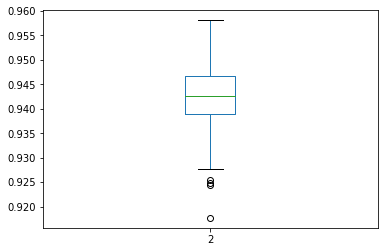

In [11]:
data[2].plot.box()

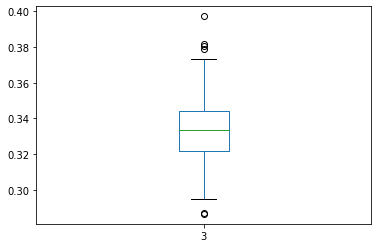

In [12]:
data[3].plot.box()

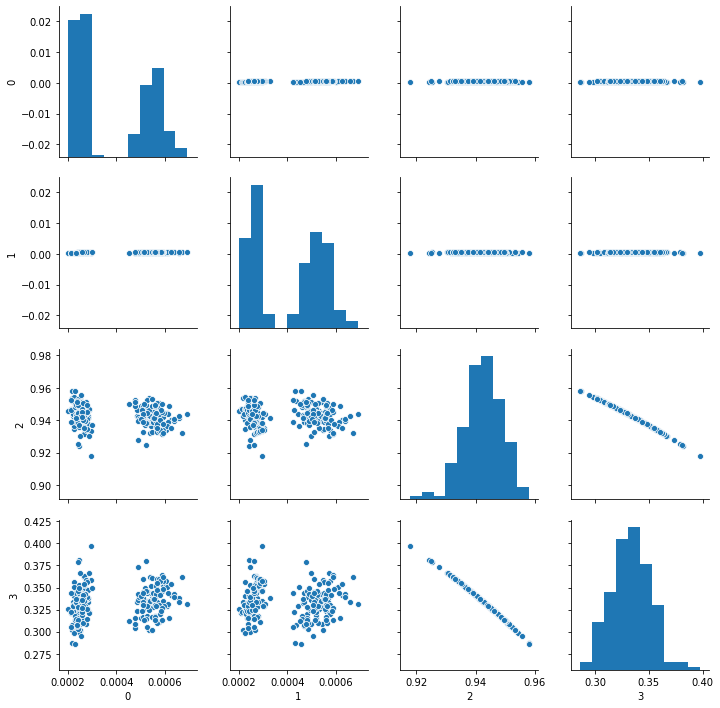

In [13]:
sns.pairplot(data)

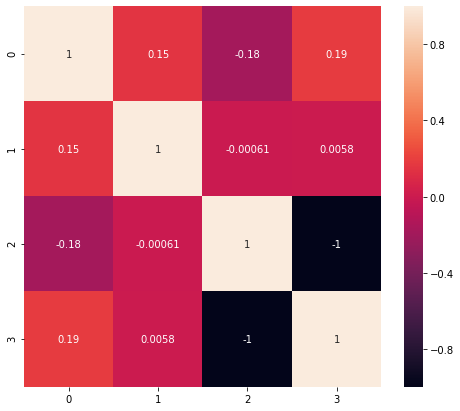

In [14]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [15]:
x=data[2].values
y=data[3].values

In [16]:
x.shape

(237,)

In [17]:
x=x.reshape(-1,1)
x.shape

(237, 1)

In [18]:
y.shape

(237,)

In [19]:
y=y.reshape(-1,1)
y.shape

(237, 1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=45)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 1)
(50, 1)
(187, 1)
(50, 1)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 27 is 0.9990435755203938


In [24]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('lm', LinearRegression()))
models.append(('knn', KNeighborsRegressor()))
models.append(('dtc', DecisionTreeRegressor()))
models.append(('rfc', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=0)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lm: 0.998148 (0.001371)
knn: 0.983566 (0.032028)
dtc: 0.990756 (0.017788)
rfc: 0.987299 (0.026444)


In [26]:
#As Logistic is predicting the best results, so applying it
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9974777880189556
9.293606191103973e-07


In [27]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lr,'project2_headbrain.pkl')

['project2_headbrain.pkl']